In [1]:
require(data.table)
require(ggplot2)
require(grid)
library("lattice")
library(gridExtra)

example2<-read.csv("example_times2", header=FALSE,sep=",")
print(example2)

for(i in 1:length(example2[,2])) {
    temp=example2[i,]
    temp2<-temp[!is.na(temp)]
    start<-temp2[1:(length(temp2)-1)]
    end<-temp2[2:length(temp2)]
    assign(paste("birdstart",i,sep=""),start)
    assign(paste("birdend",i,sep=""),end)

    }



print(birdstart3)
print(birdend3)

Loading required package: data.table
Loading required package: ggplot2
Loading required package: grid


  V1         V2        V3        V4        V5       V6       V7       V8
1  0 0.08112280 0.8253099 1.0812335 1.0831578 1.500520 1.876524 2.331444
2  0 0.12544197 0.2539290 2.0384571 2.3574543 3.281439 3.604806 3.700933
3  0 0.05209648 0.2170302 0.6339736 0.7785510 3.110404 3.146617 4.524200
4  0 0.53016815 0.6033049 0.7379139 0.7716793 1.496862 1.757271 2.350867
        V9      V10      V11      V12      V13      V14      V15      V16
1 3.249401 3.370857 3.426851 3.667534 3.721982 4.198002 4.247075 5.304120
2 4.294432 5.307607 5.309752 5.604246 5.689533 6.389521 6.605073 6.784912
3 5.067546 5.272218 5.604578 5.688766 5.777702 6.296857 6.394589 6.914861
4 2.523433 3.649148 4.028080 4.148477 4.562808 5.345982 5.430278 6.894403
       V17      V18      V19      V20      V21       V22       V23       V24
1 5.948837 6.092093 6.289593 7.742947 7.810275  8.755409  9.487889  9.698011
2 7.137515 7.337028 7.652230 8.327485 8.656283  9.551725  9.758951  9.773623
3 7.409414 8.380860 8.497492 8.816

Warning message in data.table(Set = c(rep(c("bower", "forage"), length(birdstart1)/2)), :
“Item 1 is of size 26 but maximum size is 27 (recycled leaving remainder of 1 items)”

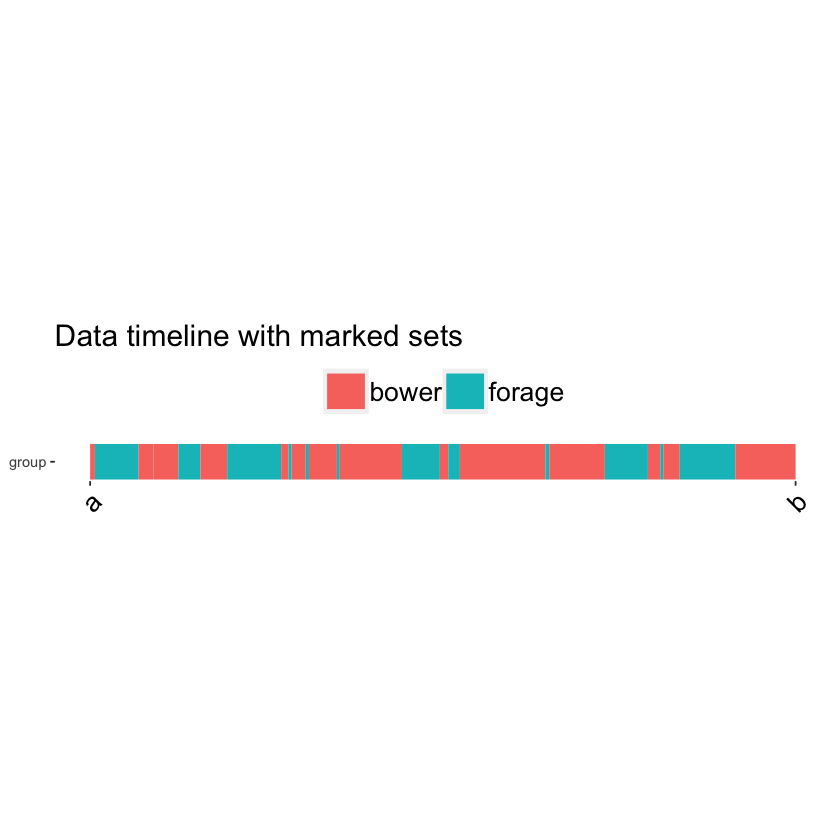

In [2]:
#Instead of creating setsTimeline, import our data
setsTimeline <- data.table(Set=c(rep(c("bower","forage"),length(birdstart1)/2)),
                           StartDate= birdstart1,
                           EndDate= birdend1
                          )

#add in labels based on mating
#setsTimeline[,StartLabel:=as.POSIXct(StartDate,tz="UTC",origin="1970-01-01")]

#add in breaks from 
breaks <- c(0,12)
labels <- c("a","b")

ggplot(setsTimeline, aes(colour=Set)) + 
  geom_segment(aes(x=StartDate, xend=EndDate, y="group", yend="group"), size=10) +
  theme(panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(), 
        panel.background = element_blank(),
        aspect.ratio=5e-02, 
        axis.text.x = element_text(colour='black', angle = 45, size = 16, hjust = 1, vjust = 1),
        legend.text = element_text(colour='black', size = 16),
        legend.title = element_text(colour='black', size = 0),
        legend.position = 'top',
        plot.title = element_text(colour='black', size = 18),
        panel.spacing = unit(1, "cm")) +
  xlab(NULL) + 
  ylab(NULL) +
  ggtitle("Data timeline with marked sets") +
  coord_cartesian(xlim = c(0,12), ylim = NULL) +
  scale_x_continuous(breaks=breaks,labels=labels)

Warning message in data.table(Set = c(rep(c("bower", "forage"), length(birdstart1)/2)), :
“Item 1 is of size 26 but maximum size is 27 (recycled leaving remainder of 1 items)”Warning message in data.table(Set = c(rep(c("bower", "forage"), length(birdstart3)/2)), :
“Item 1 is of size 22 but maximum size is 23 (recycled leaving remainder of 1 items)”Warning message in data.table(Set = c(rep(c("bower", "forage"), length(birdstart4)/2)), :
“Item 1 is of size 24 but maximum size is 25 (recycled leaving remainder of 1 items)”

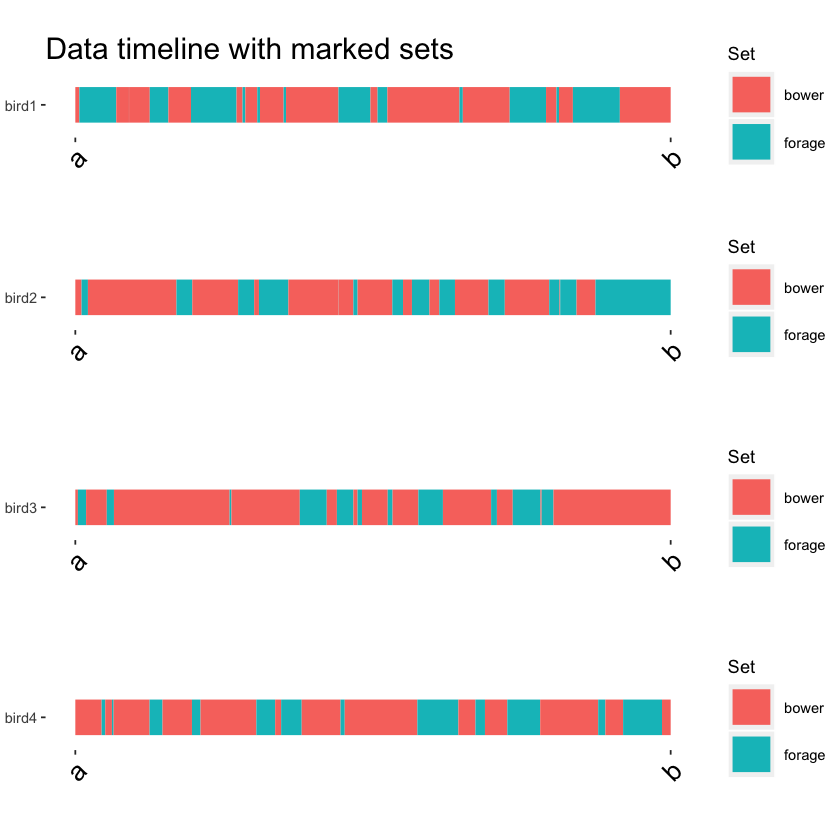

In [3]:

breaks <- c(0,12)
labels <- c("a","b")


setsTimeline <- data.table(Set=c(rep(c("bower","forage"),length(birdstart1)/2)),
                           StartDate= birdstart1,
                           EndDate= birdend1
                          )

p1<-ggplot(setsTimeline, aes(colour=Set)) + 
  geom_segment(aes(x=StartDate, xend=EndDate, y="bird1", yend="bird1"), size=10) +
  theme(panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(), 
        panel.background = element_blank(),
        aspect.ratio=10e-02, 
        axis.text.x = element_text(colour='black', angle = 45, size = 16, hjust = 1, vjust = 1),
        plot.title = element_text(colour='black', size = 18),
        panel.spacing = unit(1, "cm"),
        plot.margin = unit(c(0.1, 0.1, 0.1, 0.1), "cm")) +
  xlab(NULL) + 
  ylab(NULL) +
  ggtitle("Data timeline with marked sets") +
  coord_cartesian(xlim = c(0,12), ylim = NULL) +
  scale_x_continuous(breaks=breaks,labels=labels)


setsTimeline <- data.table(Set=c(rep(c("bower","forage"),length(birdstart2)/2)),
                           StartDate= birdstart2,
                           EndDate= birdend2
                          )




p2<-ggplot(setsTimeline, aes(colour=Set)) + 
  geom_segment(aes(x=StartDate, xend=EndDate, y="bird2", yend="bird2"), size=10) +
  theme(panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(), 
        panel.background = element_blank(),
        aspect.ratio=10e-02, 
        axis.text.x = element_text(colour='black', angle = 45, size = 16, hjust = 1, vjust = 1),
        plot.title = element_text(colour='black', size = 18),
        panel.spacing = unit(1, "cm"),
        plot.margin = unit(c(0.1, 0.1, 0.1, 0.1), "cm")) +
  xlab(NULL) + 
  ylab(NULL) +
  coord_cartesian(xlim = c(0,12), ylim = NULL) +
  scale_x_continuous(breaks=breaks,labels=labels)



setsTimeline <- data.table(Set=c(rep(c("bower","forage"),length(birdstart3)/2)),
                           StartDate= birdstart3,
                           EndDate= birdend3
                          )




p3<-ggplot(setsTimeline, aes(colour=Set)) + 
  geom_segment(aes(x=StartDate, xend=EndDate, y="bird3", yend="bird3"), size=10) +
  theme(panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(), 
        panel.background = element_blank(),
        aspect.ratio=10e-02, 
        axis.text.x = element_text(colour='black', angle = 45, size = 16, hjust = 1, vjust = 1),
        plot.title = element_text(colour='black', size = 18),
        panel.spacing = unit(1, "cm"),
        plot.margin = unit(c(0.1, 0.1, 0.1, 0.1), "cm")) +
  xlab(NULL) + 
  ylab(NULL) +
  coord_cartesian(xlim = c(0,12), ylim = NULL) +
  scale_x_continuous(breaks=breaks,labels=labels)




setsTimeline <- data.table(Set=c(rep(c("bower","forage"),length(birdstart4)/2)),
                           StartDate= birdstart4,
                           EndDate= birdend4
                          )



p4<-ggplot(setsTimeline, aes(colour=Set)) + 
  geom_segment(aes(x=StartDate, xend=EndDate, y="bird4", yend="bird4"), size=10) +
  theme(panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(), 
        panel.background = element_blank(),
        aspect.ratio=10e-02, 
        axis.text.x = element_text(colour='black', angle = 45, size = 16, hjust = 1, vjust = 1),
        plot.title = element_text(colour='black', size = 18),
        panel.spacing = unit(1, "cm"),
        plot.margin = unit(c(0.1, 0.1, 0.1, 0.1), "cm")) +
  xlab(NULL) + 
  ylab(NULL) +
  coord_cartesian(xlim = c(0,12), ylim = NULL) +
  scale_x_continuous(breaks=breaks,labels=labels)

grid.arrange(p1,p2,p3,p4, nrow = 4)



In [4]:
print(rep(c("bower","forage"),length(birdstart3)/2))
print(birdstart3)

 [1] "bower"  "forage" "bower"  "forage" "bower"  "forage" "bower"  "forage"
 [9] "bower"  "forage" "bower"  "forage" "bower"  "forage" "bower"  "forage"
[17] "bower"  "forage" "bower"  "forage" "bower"  "forage"
 [1] 0.00000000 0.05209648 0.21703024 0.63397356 0.77855096 3.11040419
 [7] 3.14661741 4.52420038 5.06754613 5.27221787 5.60457805 5.68876578
[13] 5.77770212 6.29685691 6.39458949 6.91486125 7.40941442 8.38086045
[19] 8.49749248 8.81696095 9.37553863 9.39907816 9.63802253


In [5]:
print(rep(c("bower","forage"),length(birdstart1)/2))
print(birdstart1)

 [1] "bower"  "forage" "bower"  "forage" "bower"  "forage" "bower"  "forage"
 [9] "bower"  "forage" "bower"  "forage" "bower"  "forage" "bower"  "forage"
[17] "bower"  "forage" "bower"  "forage" "bower"  "forage" "bower"  "forage"
[25] "bower"  "forage"
 [1]  0.0000000  0.0811228  0.8253099  1.0812335  1.0831578  1.5005202
 [7]  1.8765242  2.3314442  3.2494012  3.3708572  3.4268511  3.6675342
[13]  3.7219815  4.1980024  4.2470754  5.3041204  5.9488370  6.0920933
[19]  6.2895926  7.7429468  7.8102748  8.7554089  9.4878886  9.6980110
[25]  9.7488247 10.0289448 10.9753326


In [6]:
print(rep(c("bower","forage"),length(birdstart2)/2))
print(birdstart2)

 [1] "bower"  "forage" "bower"  "forage" "bower"  "forage" "bower"  "forage"
 [9] "bower"  "forage" "bower"  "forage" "bower"  "forage" "bower"  "forage"
[17] "bower"  "forage" "bower"  "forage" "bower"  "forage" "bower"  "forage"
[25] "bower"  "forage"
 [1]  0.000000  0.125442  0.253929  2.038457  2.357454  3.281439  3.604806
 [8]  3.700933  4.294432  5.307607  5.309752  5.604246  5.689533  6.389521
[15]  6.605073  6.784912  7.137515  7.337028  7.652230  8.327485  8.656283
[22]  9.551725  9.758951  9.773623 10.102706 10.484679


In [7]:
print(rep(c("bower","forage"),length(birdstart4)/2))
print(birdstart4)

 [1] "bower"  "forage" "bower"  "forage" "bower"  "forage" "bower"  "forage"
 [9] "bower"  "forage" "bower"  "forage" "bower"  "forage" "bower"  "forage"
[17] "bower"  "forage" "bower"  "forage" "bower"  "forage" "bower"  "forage"
 [1]  0.0000000  0.5301682  0.6033049  0.7379139  0.7716793  1.4968617
 [7]  1.7572710  2.3508672  2.5234330  3.6491478  4.0280803  4.1484773
[13]  4.5628075  5.3459820  5.4302782  6.8944032  7.7211568  8.0650776
[19]  8.2567232  8.7074987  9.3702810 10.5389400 10.6841887 11.0411620
[25] 11.8253450
